Dataset 'hackaton1' already exists. Deleting...
Importing dataset from images in D:\Genta\ML_practice\voxel\Visual-ai\images and annotations in D:\Genta\ML_practice\voxel\Visual-ai\annotations
 100% |█████████████████| 665/665 [1.6s elapsed, 0s remaining, 426.5 samples/s]         
Imported 665 samples
Dataset stats: {'samples_count': 665, 'samples_bytes': 619242, 'samples_size': '604.7KB', 'total_bytes': 619242, 'total_size': '604.7KB'}

Sample file paths:
 - D:\Genta\ML_practice\voxel\Visual-ai\images\potholes654.png
 - D:\Genta\ML_practice\voxel\Visual-ai\images\potholes567.png
 - D:\Genta\ML_practice\voxel\Visual-ai\images\potholes222.png



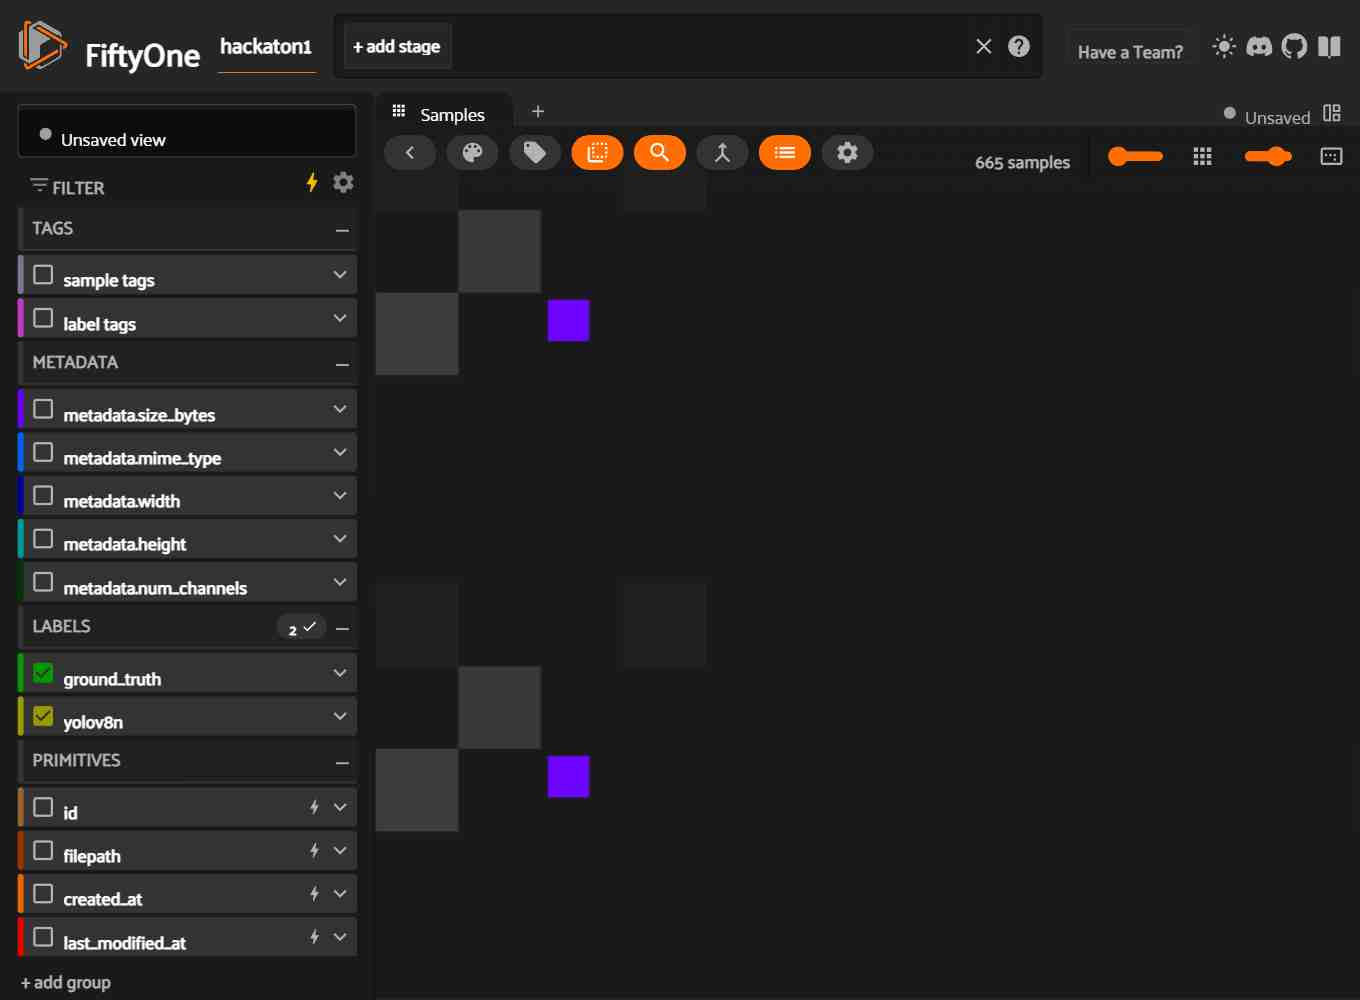


Could not connect session, trying again in 10 seconds



In [72]:
import fiftyone as fo
import os
from pathlib import Path

# Define paths
name = "hackaton1"
data_path = r"D:\Genta\ML_practice\voxel\Visual-ai\images"
labels_path = r"D:\Genta\ML_practice\voxel\Visual-ai\annotations"

# Check if the dataset already exists and delete it if necessary
if fo.dataset_exists(name):
    print(f"Dataset '{name}' already exists. Deleting...")
    fo.delete_dataset(name)

# Verify directories exist
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Images directory not found: {data_path}")

if not os.path.exists(labels_path):
    raise FileNotFoundError(f"Annotations directory not found: {labels_path}")

print(f"Importing dataset from images in {data_path} and annotations in {labels_path}")

# Import dataset by explicitly providing paths to the source media and labels
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.VOCDetectionDataset,
    data_path=data_path,
    labels_path=labels_path,
    name=name,
)

# Print dataset summary
print(f"Imported {len(dataset)} samples")
print(f"Dataset stats: {dataset.stats()}")

# View sample paths to ensure they're correct
print("\nSample file paths:")
for sample in list(dataset.take(3)):
    print(f" - {sample.filepath}")
    if hasattr(sample, "detections") and sample.detections is not None:
        print(f"   Has {len(sample.detections.detections)} detections")

# Set some default options for visualization
dataset.persistent = True
if dataset.has_field("detections"):
    dataset.default_skeleton = "detections"
    # Set a nice color for pothole detections
    dataset.default_classes = ["pothole"]
    dataset.default_detection_colors = {
        "pothole": (255, 0, 0)  # Red color
    }
dataset.save()

# Launch the app
session = fo.launch_app(dataset)

In [73]:
import fiftyone as fo
import fiftyone.zoo as foz

# Load a YOLOv8 model
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

# Apply the model to the dataset
dataset.apply_model(model, label_field="yolov8n")

# Launch the App to visualize the results
session = fo.launch_app(dataset)

                                                                                   
Could not connect session, trying again in 10 seconds

                                                                                   
Could not connect session, trying again in 10 seconds

                                                                                   
Could not connect session, trying again in 10 seconds

                                                                                   
Could not connect session, trying again in 10 seconds

                                                                                   
Could not connect session, trying again in 10 seconds

                                                                                   
Could not connect session, trying again in 10 seconds

                                                                                   
Could not connect session, trying again in 10 seconds

                           

In [74]:
# Iterate through the samples to get the ground truth labels
for sample in dataset:
    # Access the ground truth detections (boxes, labels, and confidence)
    if sample.yolov8n:
        detections = sample.yolov8n.detections
        print(f"Sample {sample.id} ground truth detections:")

        for detection in detections:
            print(f"  Label: {detection.label}")
            print(f"  Bounding Box: {detection.bounding_box}")  # [x, y, width, height]
            print(f"  Confidence: {detection.confidence}")

        

Sample 67d60c72c4b81df86449f6b3 ground truth detections:
  Label: car
  Bounding Box: [0.1968921460211277, 0.2805197797715664, 0.0592995211482048, 0.0673564150929451]
  Confidence: 0.7602596282958984
  Label: car
  Bounding Box: [0.4464416317641735, 0.2711438089609146, 0.09128055721521378, 0.09767237305641174]
  Confidence: 0.7189037799835205
  Label: car
  Bounding Box: [0.28315820172429085, 0.2455514669418335, 0.0648624524474144, 0.040180206298828125]
  Confidence: 0.5512502789497375
  Label: car
  Bounding Box: [0.09120485186576843, 0.26963290199637413, 0.04672245681285858, 0.05363930016756058]
  Confidence: 0.44650131464004517
  Label: car
  Bounding Box: [0.830768832936883, 0.29970538057386875, 0.05910203978419304, 0.04339386150240898]
  Confidence: 0.4198286533355713
  Label: car
  Bounding Box: [0.3557974062860012, 0.2401738055050373, 0.07108039408922195, 0.056815288960933685]
  Confidence: 0.34779080748558044
  Label: car
  Bounding Box: [0.19935330748558044, 0.2362255156040191

In [75]:
import pandas as pd

# List to store the data
data = []

# Iterate through the samples to get the ground truth labels
for sample in dataset:
    # Access the ground truth detections (boxes, labels, and confidence)
    if sample.yolov8n:  # Assuming 'yolov8n' contains the detections
        detections = sample.yolov8n.detections
        
        for detection in detections:
            # Extract the image filename (convert to .jpg format)
            image_name = Path(sample.filepath).stem + ".jpg"
            
            # Extract label, bounding box, and confidence
            label = detection.label
            bbox = detection.bounding_box  # [x, y, width, height]
            confidence = detection.confidence
            
            # Append the data to the list
            data.append([image_name, label, bbox[0], bbox[1], bbox[2], bbox[3], confidence])

        detections = sample.ground_truth.detections

        for detection in detections:
            # Extract the image filename (convert to .jpg format)
            image_name = Path(sample.filepath).stem + ".jpg"
            
            # Extract label, bounding box, and confidence
            label = detection.label
            bbox = detection.bounding_box  # [x, y, width, height]
            confidence = detection.confidence
            
            # Append the data to the list
            data.append([image_name, label, bbox[0], bbox[1], bbox[2], bbox[3], confidence])

# Create a DataFrame
columns = ['image_name', 'label', 'x', 'y', 'width', 'height', 'confidence']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(df)

# Optionally, save it to a CSV file
df.to_csv("annotations.csv", index=False)


          image_name    label         x         y     width    height  \
0      potholes0.jpg      car  0.196892  0.280520  0.059300  0.067356   
1      potholes0.jpg      car  0.446442  0.271144  0.091281  0.097672   
2      potholes0.jpg      car  0.283158  0.245551  0.064862  0.040180   
3      potholes0.jpg      car  0.091205  0.269633  0.046722  0.053639   
4      potholes0.jpg      car  0.830769  0.299705  0.059102  0.043394   
...              ...      ...       ...       ...       ...       ...   
2448  potholes99.jpg  pothole  0.362500  0.320000  0.189583  0.090000   
2449  potholes99.jpg  pothole  0.677083  0.333333  0.235417  0.050000   
2450  potholes99.jpg  pothole  0.529167  0.233333  0.135417  0.026667   
2451  potholes99.jpg  pothole  0.416667  0.443333  0.085417  0.056667   
2452  potholes99.jpg  pothole  0.004167  0.533333  0.502083  0.466667   

      confidence  
0       0.760260  
1       0.718904  
2       0.551250  
3       0.446501  
4       0.419829  
...      

In [82]:
df_object = pd.read_csv('annotations.csv')

grouped_df = df_object.groupby(['image_name', 'label']).size().reset_index(name='count')

pivot_df = grouped_df.pivot_table(index='image_name', columns='label', values='count', aggfunc='sum', fill_value=0)


moving_objects = ['bicycle', 'boat', 'bus', 'car', 'motorcycle', 'train', 'truck']
human_related_objects = ['person']
potholes = ['pothole']

# Create a new column 'category' based on the label
def categorize(label):
    if label in moving_objects:
        return '# of Moving Object'
    elif label in human_related_objects:
        return '# of Human-Related Object'
    elif label in potholes:
        return '# of Potholes'
    else:
        return 'Other'

grouped_df['category'] = grouped_df['label'].apply(categorize)

grouped_df = grouped_df[grouped_df['category'].isin(['# of Moving Object', '# of Human-Related Object', '# of Potholes'])]
pivot_df = grouped_df.pivot_table(index='image_name', columns='category', values='count', aggfunc='sum', fill_value=0)

# # Sample of the data
# print(df[['image_id', 'image_filename', 'pothole_id', 'potholes_in_image', 'width_px', 'height_px', 'area_px']].head(10))

# # You can now filter by filename
# if len(df) > 0:
#     example_filename = df['image_filename'].iloc[0]
#     filtered = df[df['image_filename'] == example_filename]
#     print(f"\nPotholes in image {example_filename}: {len(filtered)}")


# fo.launch_app(dataset)

pivot_df.to_csv('Potholes vs objects.csv')

In [95]:
import pandas as pd

# Load the CSV data
data = pd.read_csv('Potholes vs objects.csv')

# Add the safety column based on the specified conditions
# Safety is 0 (unsafe) if either:
# - The sum of human-related objects and moving objects is greater than 3, OR
# - The number of potholes is greater than 3
# Otherwise, safety is 1 (safe)
data['safety'] = ((data['# of Human-Related Object'] + data['# of Moving Object'] > 3) | (data['# of Potholes'] > 3)).astype(int)

# Invert the safety column to match the condition:
# 0 = unsafe, 1 = safe
data['safety'] = 1 - data['safety']

# Write the output to final.csv
data.to_csv('subfinal.csv', index=False)

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load the dataset
data = pd.read_csv('subfinal.csv')

# Define features (X) and target (y)
X = data[['# of Human-Related Object', '# of Moving Object', '# of Potholes']]
y = data['safety']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model to a file
joblib.dump(model, 'safety_predictor_model.pkl')

# Load the model (for future use)
# model = joblib.load('safety_predictor_model.pkl')

# Predict on new data
new_data = pd.DataFrame({
    '# of Human-Related Object': [0],
    '# of Moving Object': [9],
    '# of Potholes': [12]
})

prediction = model.predict(new_data)
print("Prediction (1 = Safe, 0 = Unsafe):", prediction[0])

Accuracy: 0.9924812030075187
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.99      1.00      0.99        95

    accuracy                           0.99       133
   macro avg       0.99      0.99      0.99       133
weighted avg       0.99      0.99      0.99       133

Prediction (1 = Safe, 0 = Unsafe): 0


In [98]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('safety_predictor_model.pkl')

# Load the new dataset for inference
final_data = pd.read_csv('subfinal.csv')

# Define features (X) for inference
X_final = final_data[['# of Human-Related Object', '# of Moving Object', '# of Potholes']]

# Predict safety for all rows in the final dataset
final_data['Predicted Safety'] = model.predict(X_final)

# Save the results to a new CSV file
final_data.to_csv('final.csv', index=False)

# Display the results
print(final_data[['image_name', '# of Human-Related Object', '# of Moving Object', '# of Potholes', 'Predicted Safety']])

          image_name  # of Human-Related Object  # of Moving Object  \
0      potholes0.jpg                          0                   9   
1      potholes1.jpg                          0                   3   
2     potholes10.jpg                          0                   0   
3    potholes100.jpg                          0                   0   
4    potholes101.jpg                          0                   1   
..               ...                        ...                 ...   
660   potholes95.jpg                          0                   2   
661   potholes96.jpg                          0                   0   
662   potholes97.jpg                          0                   0   
663   potholes98.jpg                          0                   0   
664   potholes99.jpg                          0                   5   

     # of Potholes  Predicted Safety  
0               12                 0  
1                2                 1  
2                2            